<a href="https://colab.research.google.com/github/sharinair14/ML/blob/main/Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv('/content/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In the dataset outcome 1 means person is diabetic and 0 means person is not diabetic.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [6]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Out of total 768 people, 268 are dibetic and 500 are non-dibetic.

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

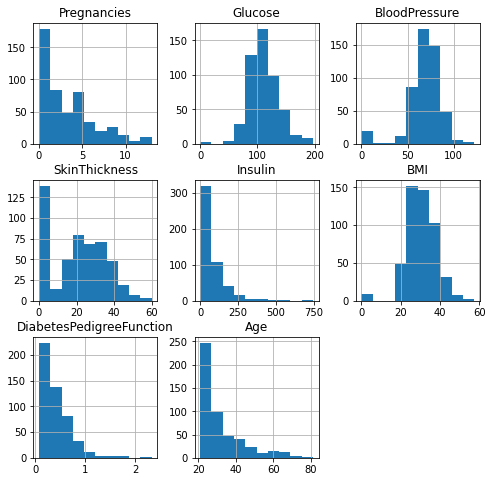

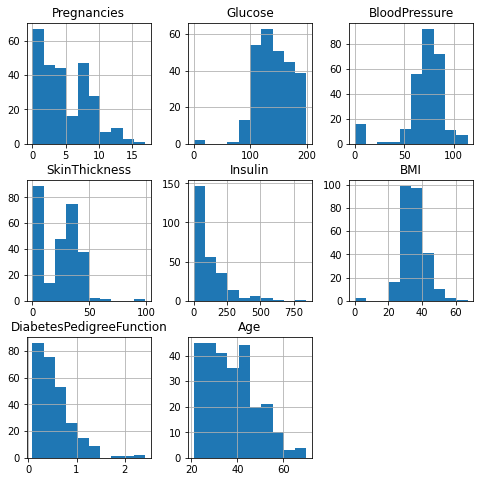

In [8]:
data.groupby('Outcome').hist(figsize=(8,8))

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In the above table , the min value of columns 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' is zero.It is clear that this values can't be zero.So I am going to impute median values of these respective columns instead of zero since mean is susceptible to outliers.As you see in the histogram there are outliers in the data.

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
print('No. of zero values in Glucose ',data[data['Glucose']==0].shape[0])

No. of zero values in Glucose  5


In [ ]:
#data[data['Glucose']==0].shape

In [12]:
print('No. of zero values in BloodPressure ',data[data['BloodPressure']==0].shape[0])

No. of zero values in BloodPressure  35


In [13]:
print('No. of zero values in SkinThickness ',data[data['SkinThickness']==0].shape[0])

No. of zero values in SkinThickness  227


In [14]:
print('No. of zero values in Insulin ',data[data['Insulin']==0].shape[0])

No. of zero values in Insulin  374


In [15]:
print('No. of zero values in BMI ',data[data['BMI']==0].shape[0])

No. of zero values in BMI  11


In [16]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].median())

In [17]:
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].median())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())
data['BMI']=data['BMI'].replace(0,data['BMI'].median())

In [18]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
len(X_train)

614

In [22]:
len(X_test)

154

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [25]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [63]:
def models(X_train,X_test):
  #Logistic regressison
  log=LogisticRegression()
  log.fit(X_train,X_test)

  #KNN
  knn=KNeighborsClassifier()
  knn.fit(X_train,X_test)

  #Naive-Bayes
  nb=GaussianNB()
  nb.fit(X_train,X_test)

  #SVM
  sv=SVC()
  sv.fit(X_train,X_test)

  #Decision tree
  dt=DecisionTreeClassifier()
  dt.fit(X_train,X_test)

  #Random Forest
  rf=RandomForestClassifier(criterion='entropy')
  rf.fit(X_train,X_test)

  #Training Set Accuracy
  print('Training set accuracy')
  print()
  print('[0]Logistic Regression',log.score(X_train,y_train))
  print('[1]KNN',knn.score(X_train,y_train))
  print('[2]Naive Bayes',nb.score(X_train,y_train))
  print('[3]SVM',sv.score(X_train,y_train))
  print('[4]Decision Tree',dt.score(X_train,y_train))
  print('[5]Random Forest',rf.score(X_train,y_train))

  return log,knn,nb,sv,dt,rf

In [64]:
model=models(X_train,y_train)

Training set accuracy

[0]Logistic Regression 0.7752442996742671
[1]KNN 0.8078175895765473
[2]Naive Bayes 0.750814332247557
[3]SVM 0.8192182410423453
[4]Decision Tree 1.0
[5]Random Forest 1.0


In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [69]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    cr=classification_report(y_test, model[i].predict(X_test))

    TP=cm[0][0]
    TN=cm[1][1]
    FP=cm[0][1]
    FN=cm[1][0]
  
    Accuracy = (TP + TN) /(TP + TN + FP + FN)
    print('Confusion Matrix of model {} is'.format(i))
    print(cm)
    print("Accuracy is",Accuracy)
    print()
    
    print('Classification report of model {} is'.format(i))
    print(cr)
    print()

Confusion Matrix of model 0 is
[[88 11]
 [25 30]]
Accuracy is 0.7662337662337663

Classification report of model 0 is
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.73      0.55      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154


Confusion Matrix of model 1 is
[[88 11]
 [22 33]]
Accuracy is 0.7857142857142857

Classification report of model 1 is
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154


Confusion Matrix of model 2 is
[[84 15]
 [22 33]]
Accuracy is 0.7597402597402597

Classification report of m

Here, I prefer Random forest algorithm which shows highest recall.In medical industry we focus on False Negatives as this should be low.So in this case Random forest algorithm is best 